In [259]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random
import time
from IPython import display


### Generate data

In [260]:
x = np.random.uniform(0, 1, (100, 2))
z = x[:, 0] * 3 - x[:, 1] * 2 + 0.1
z[z >= 0] = 1
z[z < 0] = -1
y = z 

In [261]:
def l(x, m, b):
    return m*x + b

x0 = np.linspace(0, 1, 100)

x10 = [l(x, 2, 0.5) + abs(random.gauss(.7, .2)) for x in x0]
x11 = [l(x, 2, 0.5) - abs(random.gauss(.7, .2)) for x in x0]

y10 = [1 for x in x10]
y11 = [-1 for x in x11]

x = np.stack((np.append(x0, x0), np.append(x10, x11)), axis=1)
y = np.append(y10, y11, axis=0)


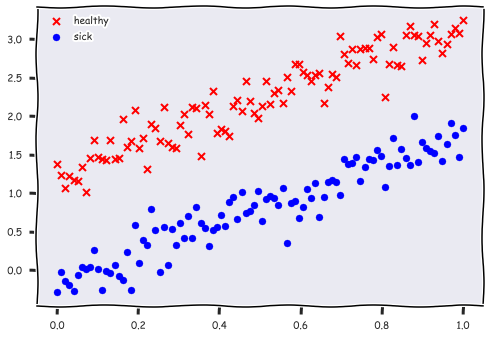

In [262]:
plt.xkcd()
plt.scatter(x[y > 0][:, 0], x[y > 0][:, 1], marker='x', c='r', label='healthy')
plt.scatter(x[y < 0][:, 0], x[y < 0][:, 1], marker='o', c='b', label='sick')
plt.legend()

### PLA

In [198]:
w = np.zeros((3))


Running with w =  [-5.97979798  4.29246212 -1.        ]
[0.19191919 0.5824376 ] -1
Updated w =  [-6.17171717  3.71002453 -2.        ]


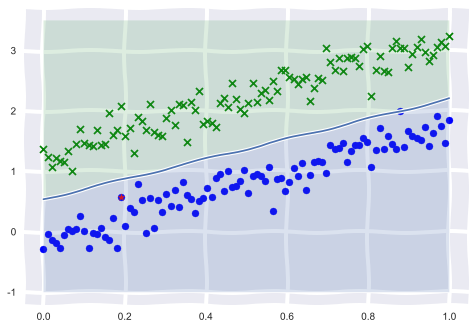

In [270]:
xe, ye = None, None

print("Running with w = ", w)

for xi, yi in zip(x, y):
    zi = w.T.dot(np.append(xi, 1))
    if yi * zi <= 0:
        xe = xi
        ye = yi
        break

if xe is None:
    print("Training complete")
else:
    print(xe, ye)
    w += ye * np.append(xe, 1)
    print("Updated w = ", w)

    l = math.pow(math.pow(w[0], 2) + math.pow(w[1], 2), 0.5)

    plt.style.use('seaborn')
    plt.scatter(x[y > 0][:, 0], x[y > 0][:, 1], marker='x', c='g', label='healthy')
    plt.scatter(x[y < 0][:, 0], x[y < 0][:, 1], marker='o', c='b', label='sick')

    plt.scatter(xe[0], xe[1], marker='*', c='r')
    #plt.quiver(0, 0, w[0] / l, w[1] / l, angles='xy', scale_units='xy', scale=1)
    #plt.quiver(0, 0, wp[0] / l, wp[1] / l, angles='xy', scale_units='xy', scale=1)
    plt.plot([0, 1], [-w[2] / w[1], (-w[2] - w[0]) / w[1]])
    
    plt.fill_between(x0, (-w[2] - w[0] * x0) / w[1], -1, alpha=0.2)
    plt.fill_between(x0, (-w[2] - w[0] * x0) / w[1], 3.5, alpha=0.2)
    
    #plt.xlim(-3, 3)
    #plt.ylim(-3, 3)

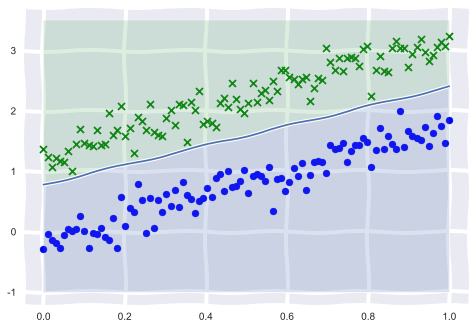

Training complete
Found w =  [-4.15151515  2.56058966 -2.        ]


In [272]:
w = np.zeros((3))

while True:
    m = 0
    for xi, yi in zip(x, y):
        zi = w.T.dot(np.append(xi, 1))
        if yi * zi <= 0:
            w += yi * np.append(xi, 1)
            m += 1
            
            display.clear_output(wait=True)
            plt.style.use('seaborn')
            plt.scatter(x[y > 0][:, 0], x[y > 0][:, 1], marker='x', c='g', label='healthy')
            plt.scatter(x[y < 0][:, 0], x[y < 0][:, 1], marker='o', c='b', label='sick')
            plt.plot([0, 1], [-w[2] / w[1], (-w[2] - w[0]) / w[1]])
            plt.fill_between(x0, (-w[2] - w[0] * x0) / w[1], -1, alpha=0.2)
            plt.fill_between(x0, (-w[2] - w[0] * x0) / w[1], 3.5, alpha=0.2)
            plt.show()
            time.sleep(0.5)
    if m == 0:
        break

print("Training complete")
print("Found w = ", w)

### Scikit-learn

In [273]:
from sklearn.linear_model import Perceptron

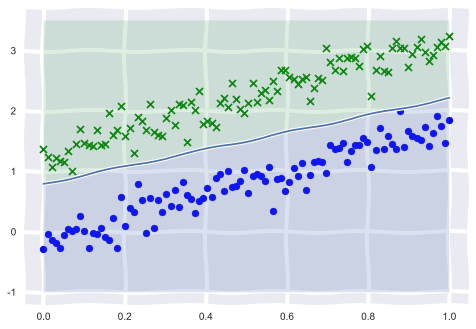

[[-5.36363636  3.77837049]] [-3.]


In [289]:
clf = Perceptron(random_state=8)
clf.fit(x, y)
plt.style.use('seaborn')
plt.scatter(x[y > 0][:, 0], x[y > 0][:, 1], marker='x', c='g', label='healthy')
plt.scatter(x[y < 0][:, 0], x[y < 0][:, 1], marker='o', c='b', label='sick')
plt.plot([0, 1], [-clf.intercept_[0] / clf.coef_[0][1], (-clf.intercept_[0] - clf.coef_[0][0]) / clf.coef_[0][1]])
plt.fill_between(x0, (-clf.intercept_[0] - clf.coef_[0][0] * x0) / clf.coef_[0][1], -1, alpha=0.2)
plt.fill_between(x0, (-clf.intercept_[0] - clf.coef_[0][0] * x0) / clf.coef_[0][1], 3.5, alpha=0.2)
plt.show()
print(clf.coef_, clf.intercept_)